### Import Library

In [1]:
import pandas as pd
import shapely
from shapely.geometry import LineString as shLs
from shapely.geometry import Point as shPt
import numpy as np 
import matplotlib.pylab as plt
import heliopy.data.spice as spicedata
import heliopy.spice as spice
from datetime import datetime, timedelta
import astropy.units as u
from astropy.time import Time
import sunpy
import astropy
import matplotlib.dates as mdates
from sunpy.coordinates import get_body_heliographic_stonyhurst
from datetime import datetime
import os
from ai import cdas, cs
from mpl_toolkits.mplot3d import Axes3D
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fb880b25750>

In [2]:
kernels = spicedata.get_kernel('psp')
kernels += spicedata.get_kernel('psp_pred')
spice.furnish(kernels)
psp = spice.Trajectory('SPP')

In [3]:
frame = 'HCI'
starttime =datetime(2021, 10,2)
endtime = datetime(2021,10,14)
times = []
while starttime < endtime:
    times.append(starttime)
    starttime += timedelta(days=1)
psp_time_num=mdates.date2num(times)     

spice.furnish(spicedata.get_kernel('psp_pred'))
psp.generate_positions(times,'Sun',frame)
psp.change_units(astropy.units.AU) 
[psp_r, psp_lat, psp_lon]=cs.cart2sp(psp.x,psp.y,psp.z)  

In [4]:
obstime = Time('2021-10-14T07:54:00.005')    ### planet position
planet_list = ['sun','venus','earth','mars']
planet_coord =[get_body_heliographic_stonyhurst(i, time=obstime) for i in planet_list]

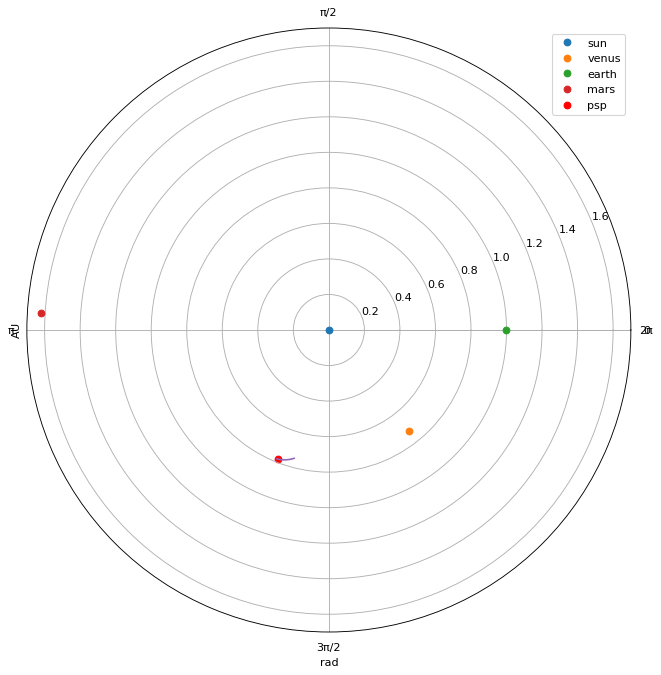

In [5]:
# %matplotlib qt
fig = plt.figure(figsize = (20,10) , dpi= 80) ### planet ploting
ax = fig.add_subplot(projection='polar')

for i, this_coord in zip(planet_list, planet_coord):
    plt.plot(this_coord.lon.to('rad'), this_coord.radius, 'o', label=i)
ax.plot(psp_lon,psp_r)
ax.scatter(psp_lon[1],psp_r[1],color='red',label='psp')
ax.set_ylim([0,1.7])
plt.legend()
plt.show()


In [6]:
%matplotlib qt
fig = plt.figure(figsize = (20,10) , dpi= 80) ### planet ploting
ax = fig.add_subplot(projection='polar')

for this_planet, this_coord in zip(planet_list, planet_coord):
    point1 = [0,1]
    point2 = [0.983*np.pi,1.636]
    x_values = [point1[0], point2[0]] #gather x-values.
    y_values = [point1[1], point2[1]] #gather y-values.
    plt. plot(x_values, y_values,'grey')
    plt.plot(this_coord.lon.to('rad'), this_coord.radius, 'o', label=this_planet)

ax.set_ylim([0,1.7])
plt.legend()
plt.show()


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


In [ ]:
############# Earth
starttime =datetime(2021, 10, 2)
endtime = datetime(2021, 10, 14)
earth_time = []
while starttime < endtime:
    earth_time.append(starttime)
    starttime += timedelta(days=1)
earth_time_num=mdates.date2num(earth_time)     

earth=spice.Trajectory('Earth') 
earth.generate_positions(earth_time,'Sun',frame)
earth.change_units(astropy.units.AU)  
[earth_r, earth_lat, earth_lon]=cs.cart2sp(earth.x,earth.y,earth.z)


################# venus
venus_time_num=earth_time_num
venus=spice.Trajectory('Venus')  
venus.generate_positions(earth_time,'Sun',frame)  
venus.change_units(astropy.units.AU)  
[venus_r, venus_lat, venus_lon]=cs.cart2sp(venus.x,venus.y,venus.z)


############### Mars

mars_time_num=earth_time_num
mars=spice.Trajectory('MARS')  
mars.generate_positions(earth_time,'Sun',frame)  
mars.change_units(astropy.units.AU)  
# print(earth_time)
[mars_r, mars_lat, mars_lon]=cs.cart2sp(mars.x,mars.y,mars.z)


fig = plt.figure(figsize = (20,10) , dpi= 80) ### planet ploting
ax = fig.add_subplot(projection='polar')
plt.scatter(venus.x,venus.y)
plt.scatter(earth.x,earth.y)
plt.show()

distance = np.sqrt( (earth.x-venus.x)**2 + (earth.y-venus.y)**2)
print(distance)